**This notebook investigates how the covariance matrix of $z$-scores, from GWAS on randomly assigned Case/Controls, depends on the correlation of the underlying SNPs (i.e. the square root of the LD matrix, including sign).**

# Generating fake genotypes

For simplicity, consider a fixed sized population of $N$ individuals. Each individual have 2 chromosomes with $N_s$ SNPs, which take binary values. The population can be described as a binary $N_s\times 2 N$ matrix, where each column corresponds to a chromosome, each individual corresponds to two consecutive columns, and each row corresponds to the population genotypes of a given SNP. 

Each new generation is generated by the following steps: 
1. Each (binary) element in the population matrix may randomly flip according to a (low) mutation rate. 
2. For each individual, there is a crossover at a random site $i$. The individual can be identified by two chromosomes (rows in the binary population matrix) $a = [a_1,...,a_{N_s}]$, and $b=[b_1,...,b_{N_s}]$, where $a_k$ and $b_k$ takes binary values. After the crossover, the values are shuffeled such that $a\rightarrow [a_1,...,a_i,b_{i+1},...,b_{N_s}]$ and $b\rightarrow [b_1,...,b_i,a_{i+1},...,a_{N_s}]$. The crossover site $i$ is drawn randomly from a list of candidate hotspots, which are randomly distributed along the column index range.
3. The new population matrix is generated by randomly drawing $2N$ columns (with replacement) from the previous population matrix (this is essentially the Wright-Fisher model for genetic drift). Note that the probability for the death of a chromosome (neglecting the crossover effect) is $(1-1/2N)^{2N} \rightarrow e^{-1}\simeq 37\%$, independent of population size for large $N$.

The dosage of an individual is calculated by the sum of the two (binary) values for the corresponding SNP in the pair of chromosmome columns.

This procedure yields genotypes for a population which mimics the LD matrix block structure. The binary image below, shows the population matrix after a number of generations (initial condition is binary white noise). 

In [1]:
import Base
using FakeGeno # load functions for generating sample

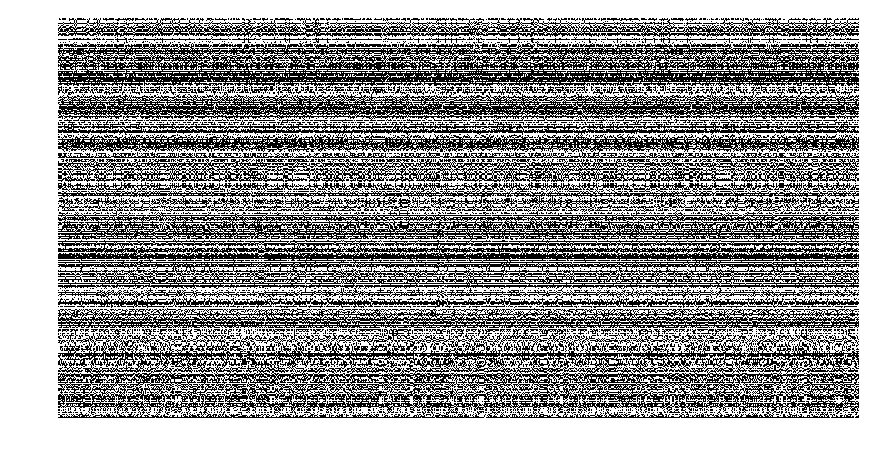

generate sample population ....

# inidviduals  : 1000
# chromosomes  : 2000
# SNPs         : 1000
# generations  : 8000   (4.0 x char. decay)
# hotspots     : 7

mutationrate set to 0.00029141170619945833
corresponding to average heterozygosity : 0.35


In [2]:
Nsnp = 1000
Nind = 1000
Nhotspots = 7
pop = make_pop(Nsnp,Nind, Nhotspots);
showmatrix(pop);

# Correlation of genotypes 

We can calculate the correlation matrix for this population, the square of which corresponds to the LD matrix.
In the matrix plot below, red values correspond to high correlation, while blue values correspond to low values.

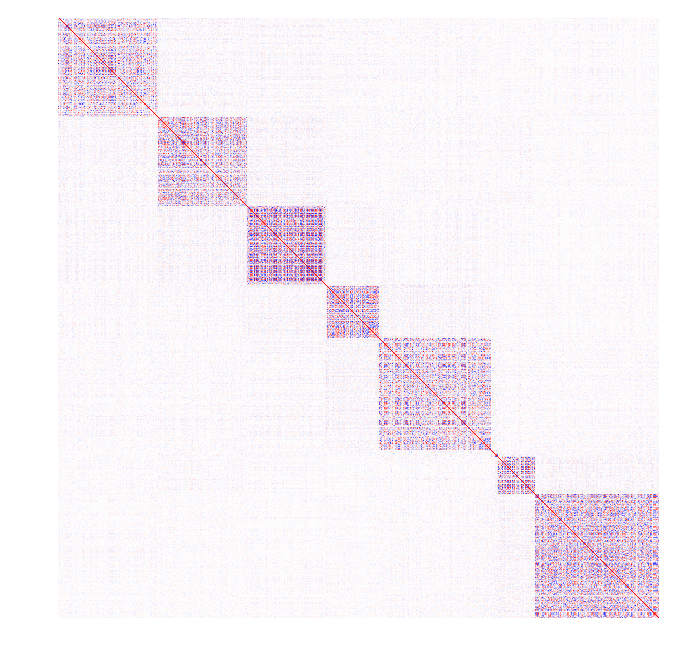

In [3]:
COR = cor(pop,2)
showmatrix(COR, cmap="bwr", minmax=[-1,1]);

# GWAS for randomly assigned Case/Controls

We can calculate many GWASes (logistic regression on dosages) for this population, on randomly assigned Case/Controls, according to a fixed low prevalence.

In [6]:
prevalence = 0.1
Npermutation = 1000 # number of z-score vectors
zmat = nullpermuteGWAS(pop, prevalence, Npermutation) # calculatin z-scores Npermutation for GWASes

1000x1000 Array{Float64,2}:
  1.3064     -0.274686  -1.23705    …  -1.34328     1.52947     0.733938 
 -0.302175    1.03192    1.20627       -0.269807    1.20627    -0.518776 
  0.6575     -0.708472  -0.560753       2.02194    -0.923502    0.298401 
 -0.0296659   0.954455  -0.0672269      1.44255    -0.672586    0.286367 
 -0.864149   -1.04866   -0.724742      -1.42033     1.11776     0.737868 
 -0.653536    0.741441   0.034481   …  -0.516902   -0.375649   -0.244744 
  0.70117     1.76121    0.1159        -0.115343   -0.0759857   0.593097 
  0.0562344   0.176826   1.47225       -0.308466    1.10065     0.403843 
 -1.29079    -1.49927   -1.02014        0.931001   -0.792096   -1.4505   
  0.292963    0.28485    0.438019       1.42166    -0.526707    0.427828 
 -0.401124   -0.256235   0.822029   …   0.333473   -0.680821   -0.720974 
 -0.712019   -0.594405  -0.761204      -1.00362    -1.31571     0.175979 
 -0.225234   -1.38089   -0.610481      -0.312008   -1.23719     0.593973 
  ⋮       

# Covariance of $z$-score vectors
From the $z-$score vectors, we can estimate the covariance matrix. Plotting this shows a remarkable similarity to the genotype correlations.

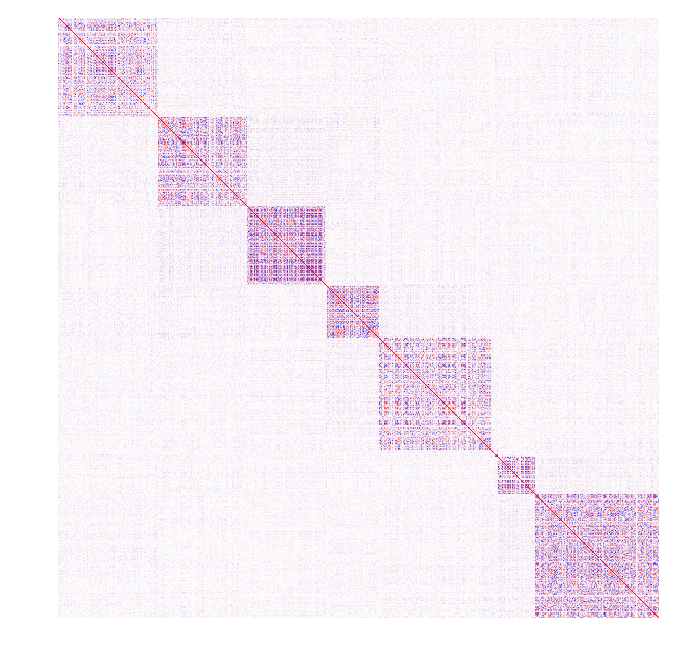

In [14]:
COVZ = Base.cov(zmat,2)
showmatrix(COVZ, cmap="bwr", minmax=[-1,1]);

Plotting the difference shows a more convincing similariy:

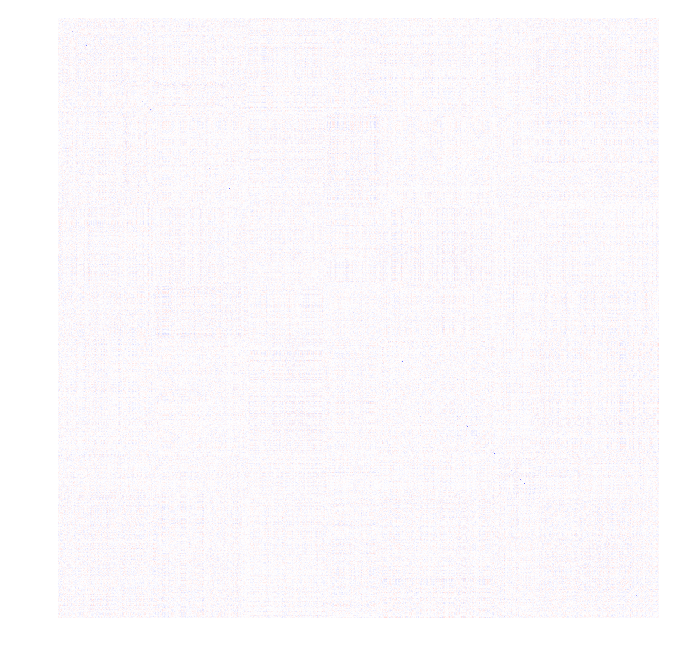

In [16]:
showmatrix(COVZ-COR, cmap="bwr", minmax=[-1,1]);

The mean and standard deviation for the absolute difference between the genotype correlation and the $z$-score covariance:

In [20]:
absdiff = abs(COVZ-COR)
nonnan_absdiff = absdiff[!isnan(absdiff)]
println("mean : $(mean(nonnan_absdiff))")
println("std  : $(sqrt(var(nonnan_absdiff)))")

mean : 0.030128734735562452
std  : 0.022822310557341116


Playing around with different prevalences does not seem to change the results.